# Proyecto - Analítica Descriptiva
### Autor: Javier Criollo
### Fecha: 2023/06/06

## Tema: Se busca ver cuál es la provincia donde hubo más desaparecidos en Ecuador, encontrando el perfil de persona que es más frecuente a desaparecer.
## Objetivos:
### Determinar el perfil de persona que más desaparece por provincia.
### Categorizar los datos por rangos de edad.
### Determinar el mes donde hubo más desaparecidos, siendo los meses desde Enero a Abril.


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Carga el archivo CSV
datos = pd.read_csv('data/mdg_personasdesaparecidas_pm_2023_enero_abril.csv', encoding='latin1', sep=';')

# Imprime los datos
# print(datos)


In [139]:
# Imprimir las columnas del dataset
columnas = datos.columns
print(columnas)

Index(['Provincia', 'Latitud', 'Longitud', 'Edad Aprox.', 'Sexo',
       'Motivo Desaparción', 'Motivo Desaparción Obs.', 'Fecha Desaparición',
       'Situación Actual', 'Fecha Localización'],
      dtype='object')


In [140]:

# Load the dataset from a CSV file
df = datos

# Group the records by age and sex, and count the number of occurrences 
#grouped_counts2 = df.groupby(['Edad Aprox.', 'Sexo','Motivo Desaparción'])['Provincia'].count().reset_index()
agrupadoProvincia = df.groupby('Provincia')
for Provincia, data in agrupadoProvincia:
    print(f'Provincia:{Provincia}')
    print(data.head(10))
    print('----------------------------------------------------------------------------------------------')
# Print the grouped counts
print(agrupadoProvincia)


Provincia:AZUAY
    Provincia      Latitud      Longitud  Edad Aprox.    Sexo  \
14      AZUAY  -2,89018174  -79,02961728            1   MUJER   
18      AZUAY  -2,89328886   -78,9994653           23  HOMBRE   
29      AZUAY  -2,87178367  -79,06679508           64  HOMBRE   
38      AZUAY    -2,979583   -79,6848909           20  HOMBRE   
40      AZUAY  -2,88142599  -79,00526814           47   MUJER   
69      AZUAY   -2,9100879   -79,0349661           25  HOMBRE   
162     AZUAY  -2,92674978  -79,05076146           17   MUJER   
182     AZUAY   -2,8870218   -78,9641763           19   MUJER   
183     AZUAY  -2,91418544  -79,00084692           15   MUJER   
184     AZUAY  -2,91418544  -79,00084692           15  HOMBRE   

       Motivo Desaparción  Motivo Desaparción Obs. Fecha Desaparición  \
14   PROBLEMAS FAMILIARES  PROBLEMAS SENTIMENTALES          18/3/2023   
18     PROBLEMAS SOCIALES  INFLUENCIA DE AMISTADES          19/3/2023   
29     PROBLEMAS SOCIALES  INFLUENCIA DE AMISTADE

### Crear un nuevo dataset de perfiles
#### un perfil es 1 registro en el cual se encuentra relacionado los valores de la columna Provincia, Edad Aprox., Sexo, Motivo Desaparicion
#### La columna cantidad representa las veces que se repite cada perfil de persona propensa a desaparecer

In [141]:


# Group the records by age and sex, and count the number of occurrences
grouped_counts = df.groupby(['Provincia','Edad Aprox.', 'Sexo','Motivo Desaparción']).size().reset_index(name='Cantidad').sort_values('Cantidad', ascending=False)

# Print the grouped counts
print(grouped_counts)


               Provincia  Edad Aprox.    Sexo    Motivo Desaparción  Cantidad
463               GUAYAS           14   MUJER  PROBLEMAS FAMILIARES        35
1082           PICHINCHA           15   MUJER    PROBLEMAS SOCIALES        33
454               GUAYAS           13   MUJER  PROBLEMAS FAMILIARES        29
1081           PICHINCHA           15   MUJER  PROBLEMAS FAMILIARES        28
1088           PICHINCHA           16   MUJER  PROBLEMAS FAMILIARES        25
...                  ...          ...     ...                   ...       ...
576               GUAYAS           34  HOMBRE   PROBLEMA ECÓNOMICOS         1
575               GUAYAS           34  HOMBRE             FALLECIDO         1
574               GUAYAS           33  HOMBRE              SIN_DATO         1
573               GUAYAS           33  HOMBRE  PROBLEMAS FAMILIARES         1
1488  ZONA NO DELIMITADA           23   MUJER  PROBLEMAS FAMILIARES         1

[1489 rows x 5 columns]


#### Se imprime las columnas que tiene el nuevo dataset

In [142]:
columnas = grouped_counts.columns
print(columnas)

Index(['Provincia', 'Edad Aprox.', 'Sexo', 'Motivo Desaparción', 'Cantidad'], dtype='object')


### Se normaliza la columna Cantidad, por cada 100000 habitantes
#### para normalizar se divide el registro de cantidad perteneciente a cada perfil por la poblacion de la provincia a la que pertenece ese perfil
#### A la cantidad normalizada se la multiplica por 100000 

#### Los registros de la columna Cantidad_Normalizada permiten ajustar los valores de cantidad en relacion a la poblacion de cada provincia y se calcula la tasa poblacional por cada 100000 habitantes

#### Si tomamos en cuenta el registro 1488 perteneciente a ZONA NO DELIMITADA, la cantidad es 1 pero comparado con el registro 573  perteneciente a GUAYAS, la cantidad tambien es 1. Al normalizar el valor de ZONA NO DELIMITADA es mayor que el valor de GUAYAS.
#### Porque una persona desapareciada en  ZONA NO DELIMITADA, estadisticamente representa mas que 1 persona desaparecidad en GUAYAS

In [143]:


poblacion_provincias = {
    'AZUAY': 881394,
    'BOLIVAR': 209933,
    'CAÑAR': 281396,
    'CARCHI': 186869,
    'COTOPAXI': 488716,
    'CHIMBORAZO': 524004,
    'EL ORO': 715751,
    'ESMERALDAS': 643654,
    'GUAYAS': 4387434,
    'IMBABURA': 476257,
    'LOJA': 521154,
    'LOS RIOS': 921763,
    'MANABI': 1562079,
    'MORONA SANTIAGO': 196535,
    'NAPO': 133705,
    'PASTAZA': 114202,
    'PICHINCHA': 3228233,
    'TUNGURAHUA': 590600,
    'ZAMORA CHINCHIPE': 120416,
    'GALAPAGOS': 33042,
    'SUCUMBIOS': 230503,
    'ORELLANA': 161338,
    'SANTO DOMINGO DE LOS TSACHILAS': 458580,
    'SANTA ELENA': 401178,
    'ZONA NO DELIMITADA': 41907
}

#print("\nPoblación total en millones de habitantes")
poblacion_total = sum(poblacion_provincias.values())
#print(poblacion_total)
#print('----------------------------------------------------------------------------------------------')

#print("\nCalcula la proporción de población para cada provincia")
grouped_counts['Proporcion_Poblacion'] = grouped_counts['Provincia'].map(poblacion_provincias)
#print(grouped_counts)

#print(grouped_counts['Proporcion_Poblacion'])
#print('----------------------------------------------------------------------------------------------')

#print("\nCalcula la cantidad normalizada por cada 100,000 habitantes")
grouped_counts['Cantidad_Normalizada'] = grouped_counts['Cantidad'] / grouped_counts['Proporcion_Poblacion'] * 100000
#print(grouped_counts['Cantidad_Normalizada'])
#print('----------------------------------------------------------------------------------------------')

#print("\nElimina la columna de proporción de población")
grouped_counts = grouped_counts.drop('Proporcion_Poblacion', axis=1)
#print('----------------------------------------------------------------------------------------------')

print("\nMuestra el DataFrame resultante")
print(grouped_counts)
print('----------------------------------------------------------------------------------------------')




Muestra el DataFrame resultante
               Provincia  Edad Aprox.    Sexo    Motivo Desaparción  Cantidad  \
463               GUAYAS           14   MUJER  PROBLEMAS FAMILIARES        35   
1082           PICHINCHA           15   MUJER    PROBLEMAS SOCIALES        33   
454               GUAYAS           13   MUJER  PROBLEMAS FAMILIARES        29   
1081           PICHINCHA           15   MUJER  PROBLEMAS FAMILIARES        28   
1088           PICHINCHA           16   MUJER  PROBLEMAS FAMILIARES        25   
...                  ...          ...     ...                   ...       ...   
576               GUAYAS           34  HOMBRE   PROBLEMA ECÓNOMICOS         1   
575               GUAYAS           34  HOMBRE             FALLECIDO         1   
574               GUAYAS           33  HOMBRE              SIN_DATO         1   
573               GUAYAS           33  HOMBRE  PROBLEMAS FAMILIARES         1   
1488  ZONA NO DELIMITADA           23   MUJER  PROBLEMAS FAMILIARES         

### Se obtiene la moda de cada provincia
#### Representa el perfil que mas se repite en cada provincia

In [146]:
columnas = grouped_counts.columns
#print(columnas)

# Agrupar por provincia
grupo_provincia = grouped_counts.groupby('Provincia')
#print(grupo_provincia)
#print('----------------------------------------------------------------------------------------------')

# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre cada grupo
for provincia, grupo in grupo_provincia:
    # Obtener el registro más repetido por provincia
    registro_mas_repetido = grupo.loc[grupo['Cantidad_Normalizada'].idxmax()]

    # Agregar el registro al resultado final
    resultados.append(registro_mas_repetido)

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar el DataFrame resultante
print(resultados_df)


                           Provincia  Edad Aprox.    Sexo  \
21                             AZUAY           15   MUJER   
100                          BOLIVAR           17   MUJER   
115                           CARCHI           16   MUJER   
132                            CAÑAR           14   MUJER   
172                       CHIMBORAZO           15   MUJER   
256                         COTOPAXI           15   MUJER   
317                           EL ORO           16   MUJER   
391                       ESMERALDAS           17   MUJER   
425                        GALAPAGOS           49  HOMBRE   
463                           GUAYAS           14   MUJER   
690                         IMBABURA           13   MUJER   
763                             LOJA           16   MUJER   
801                         LOS RIOS           14   MUJER   
865                           MANABI           13   MUJER   
931                  MORONA SANTIAGO           14   MUJER   
967                     

### Como resultado se obtiene que en la provincia de Pichincha el perfil de persona mas suceptible a desaparecer es:
#### Tener 15 años, ser mujer y tener problemas familiares

### Los resultado por provincia se listan en el dataframe superior

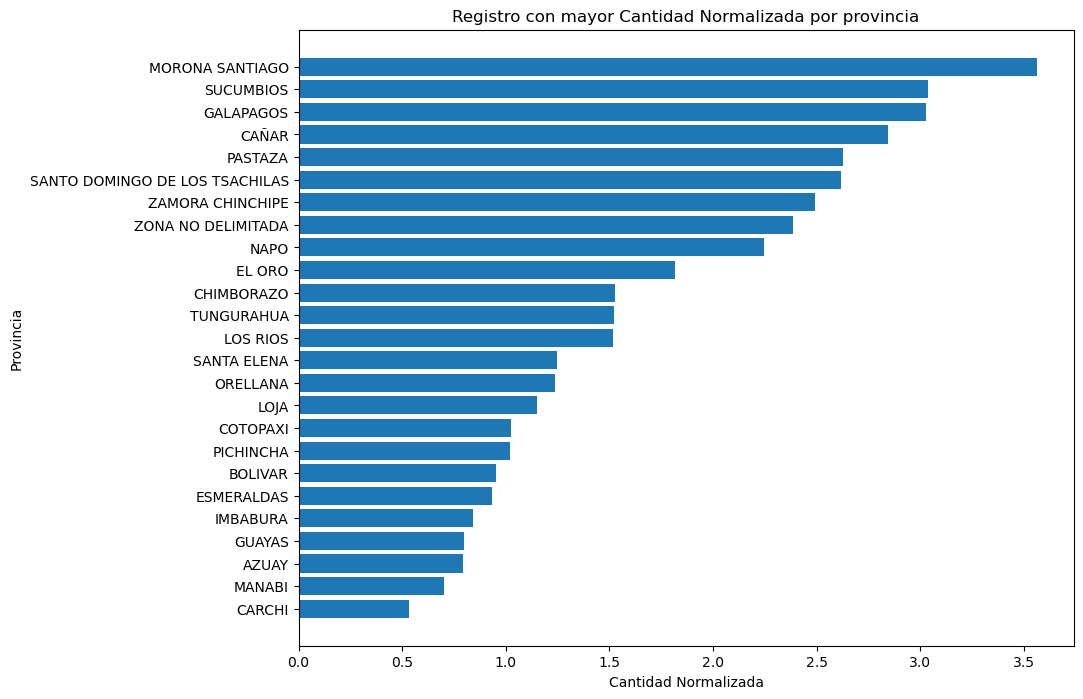

In [172]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por cantidad normalizada
resultados_df = resultados_df.sort_values(by='Cantidad_Normalizada', ascending=True)

# Obtener los valores necesarios para el gráfico
provincias = resultados_df['Provincia']
cantidades_normalizadas = resultados_df['Cantidad_Normalizada']

# Configurar el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(provincias, cantidades_normalizadas)
plt.xlabel('Cantidad Normalizada')
plt.ylabel('Provincia')
plt.title('Registro con mayor Cantidad Normalizada por provincia')

# Mostrar el gráfico
plt.show()


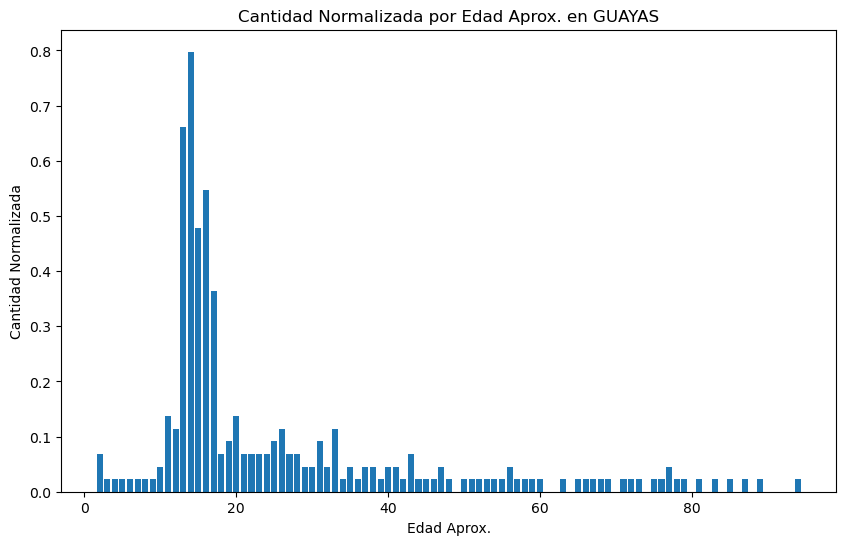

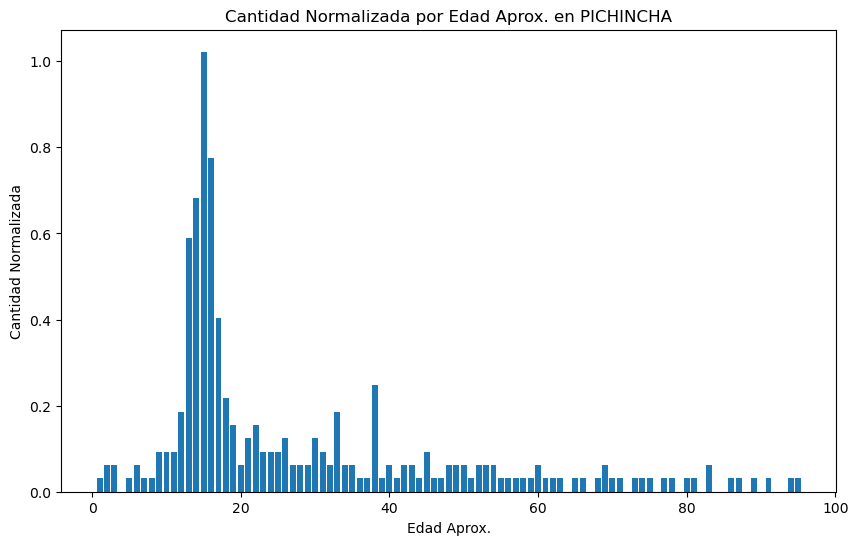

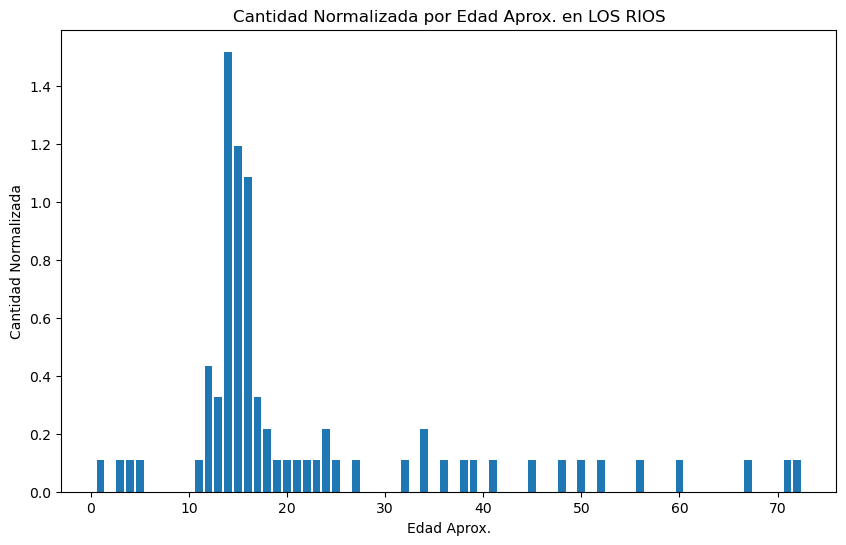

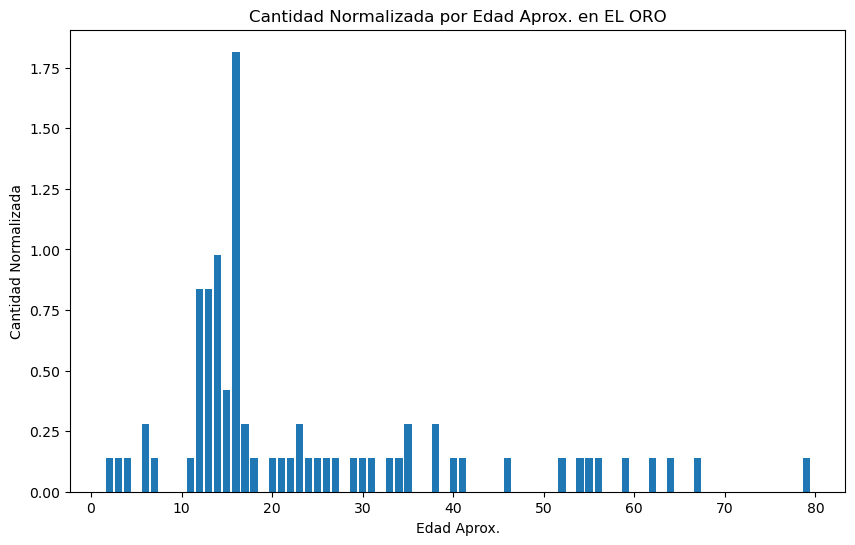

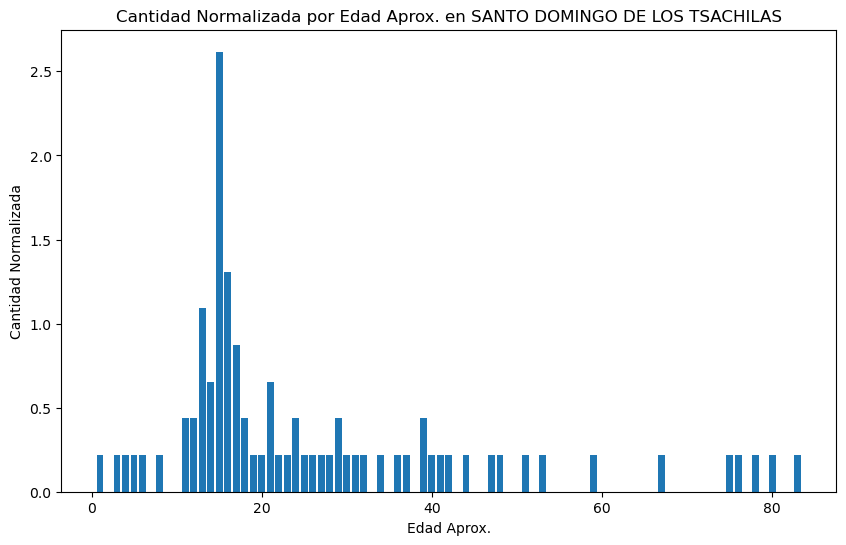

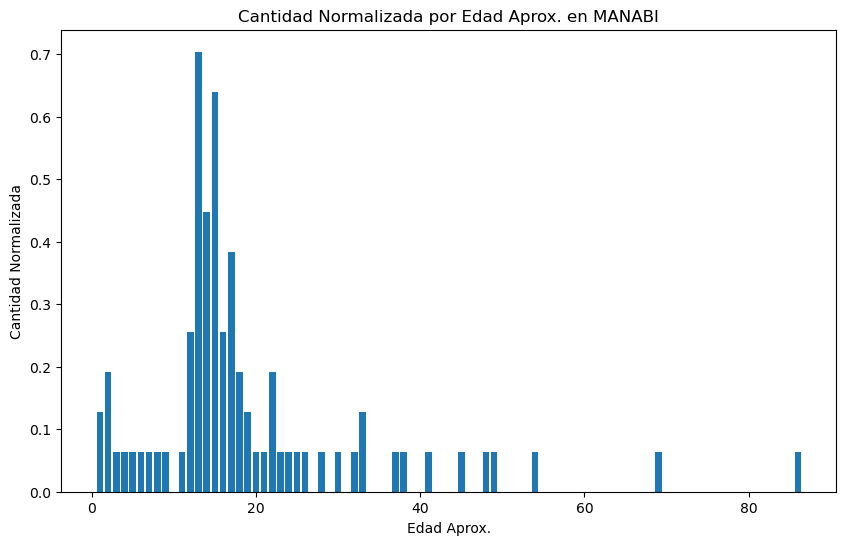

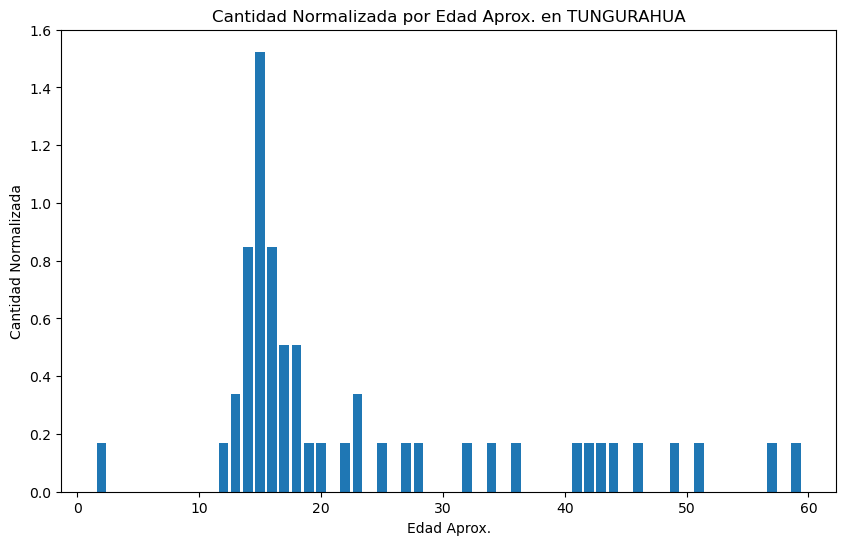

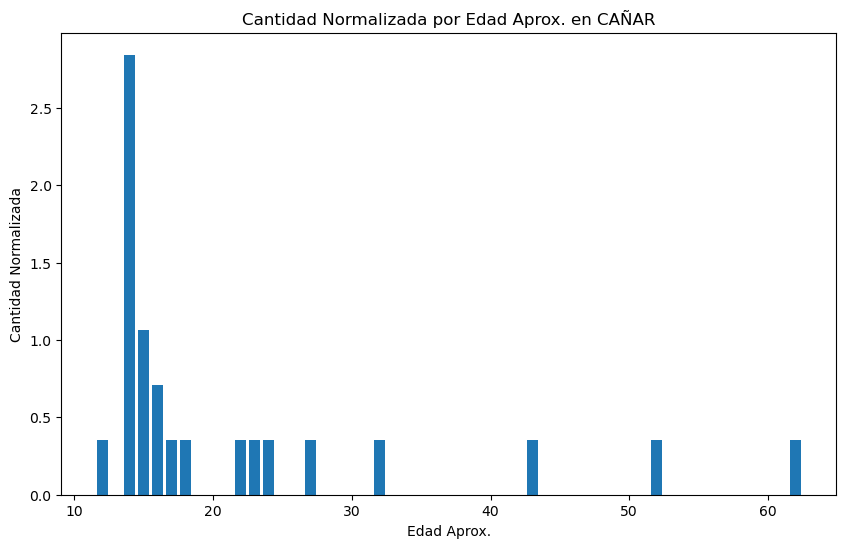

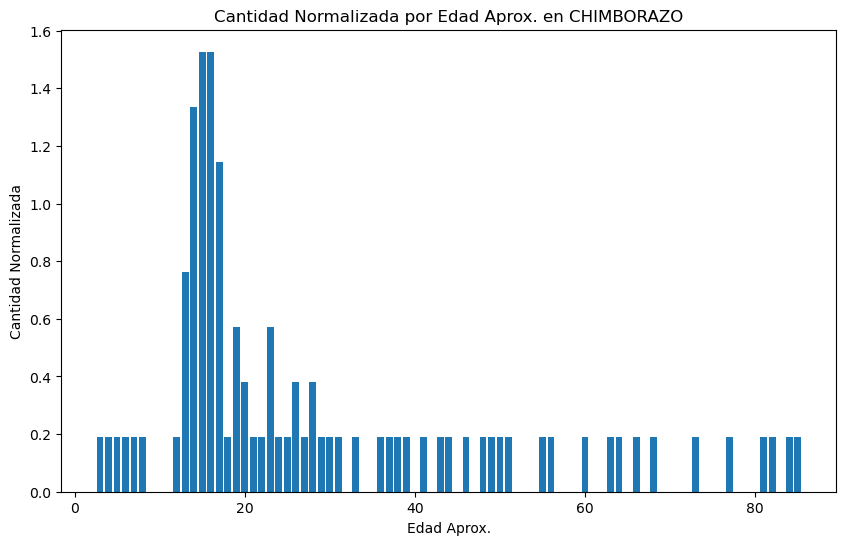

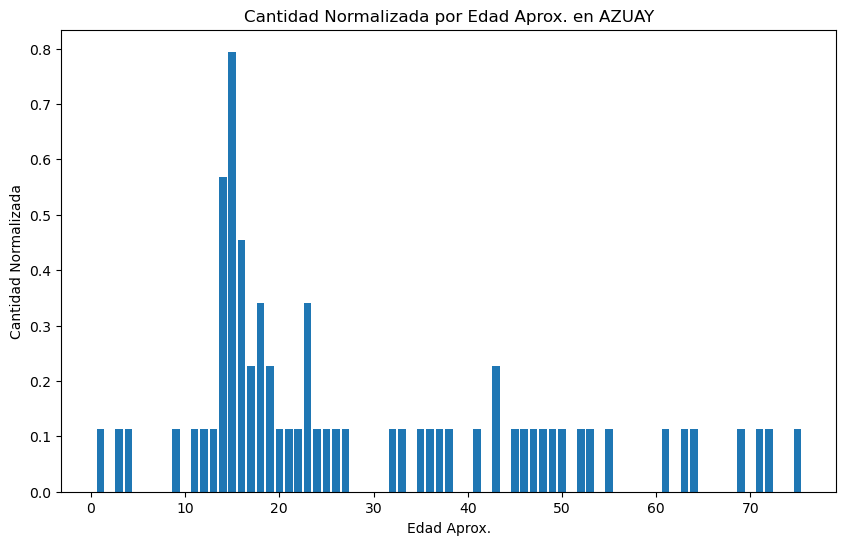

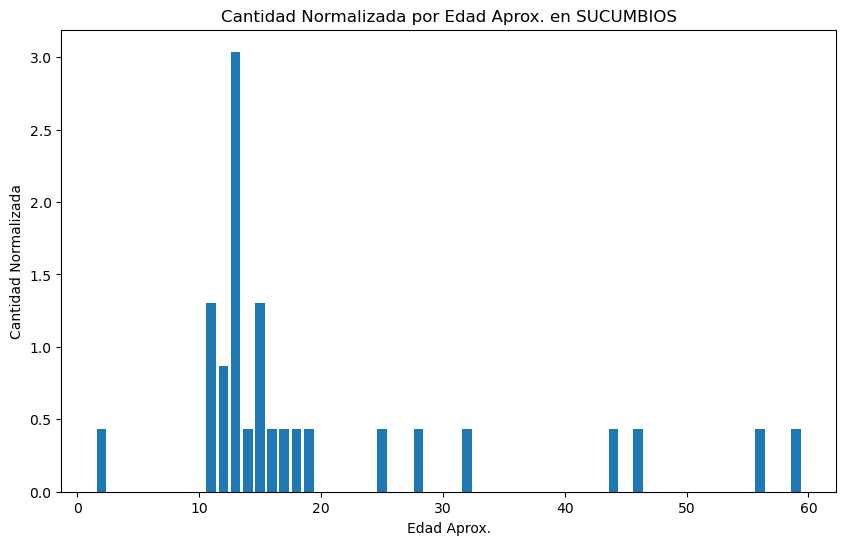

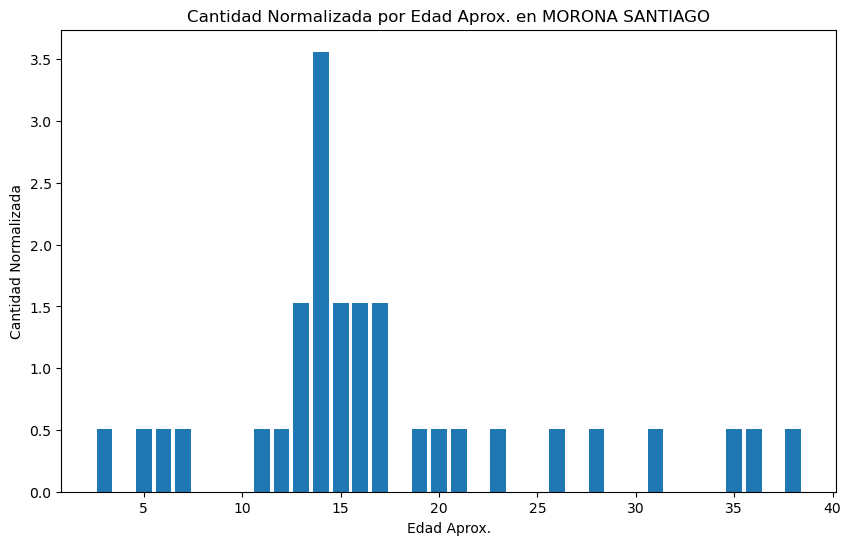

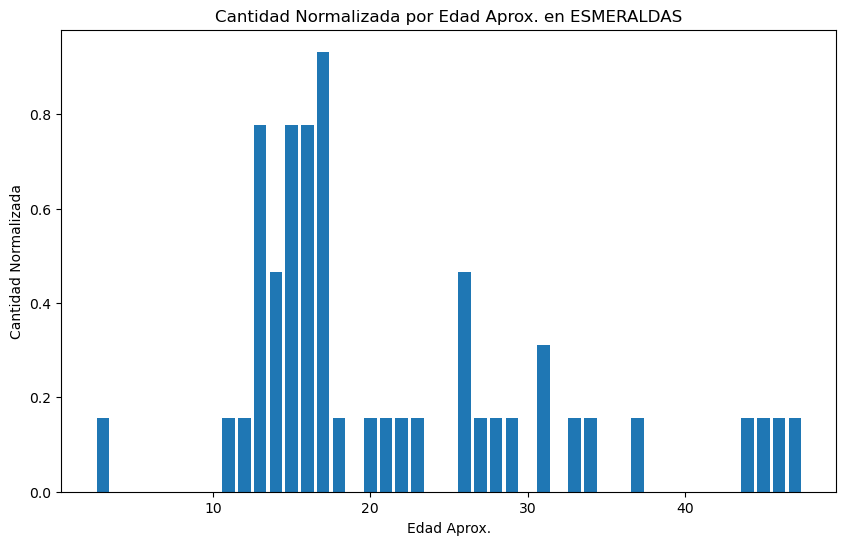

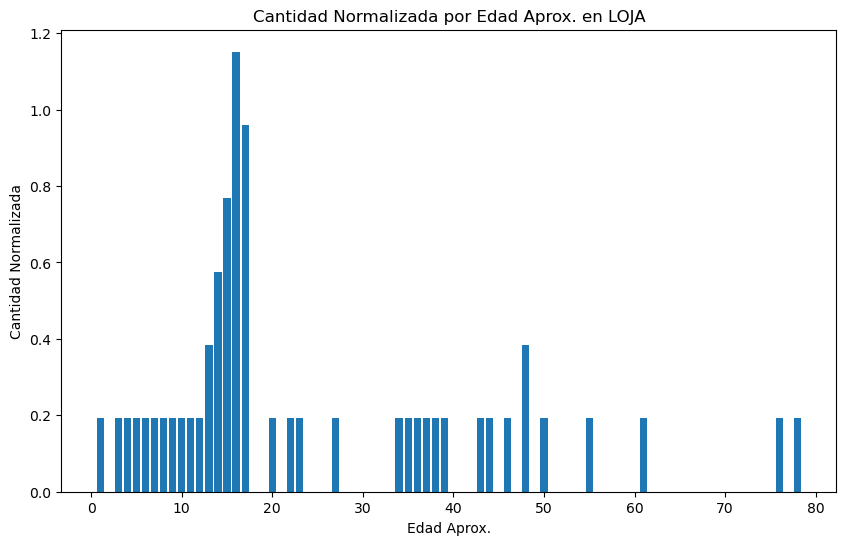

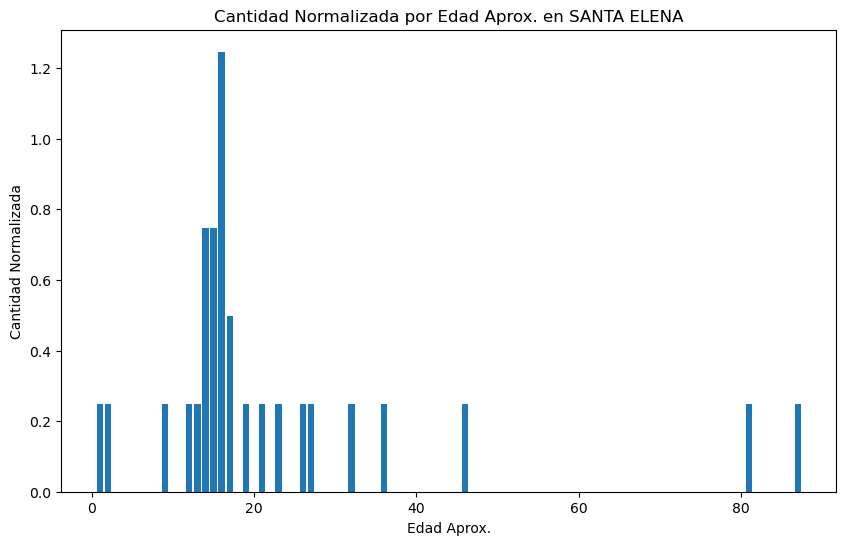

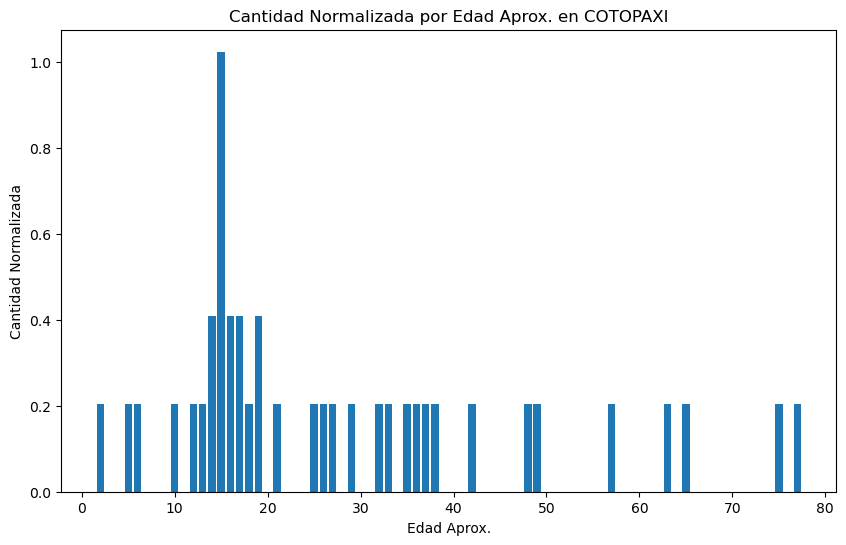

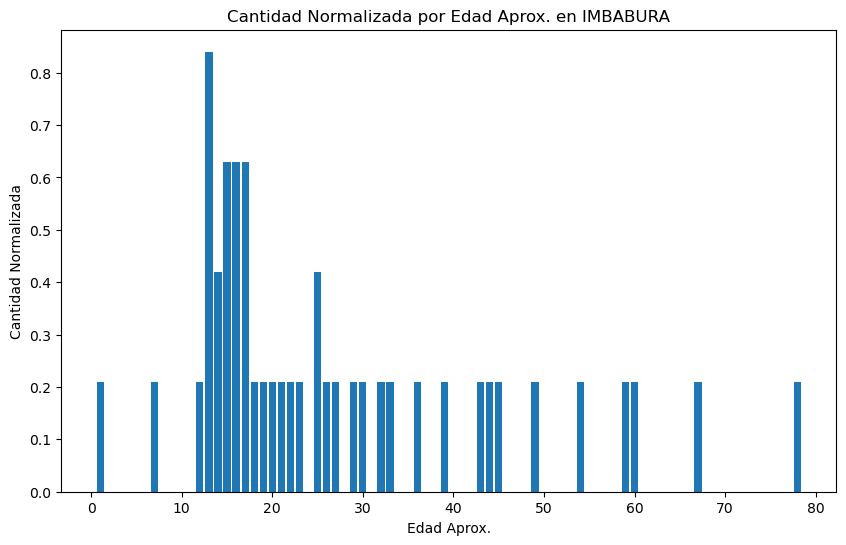

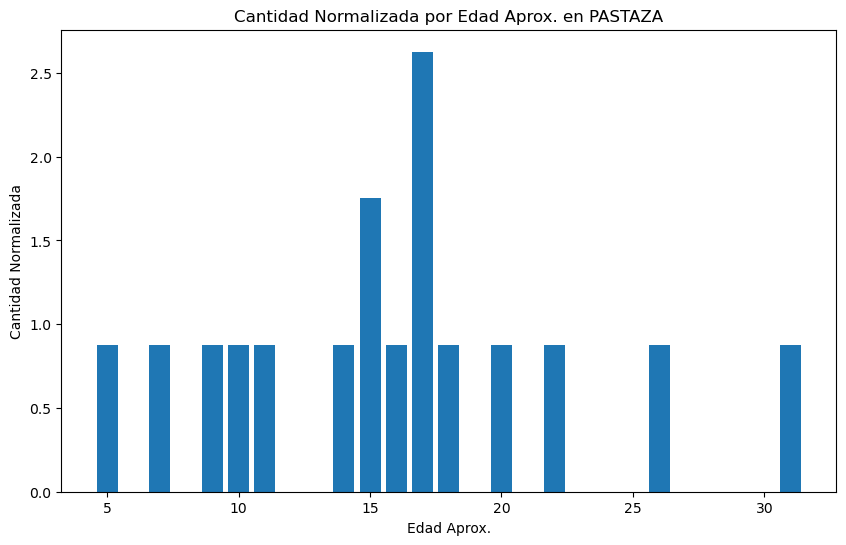

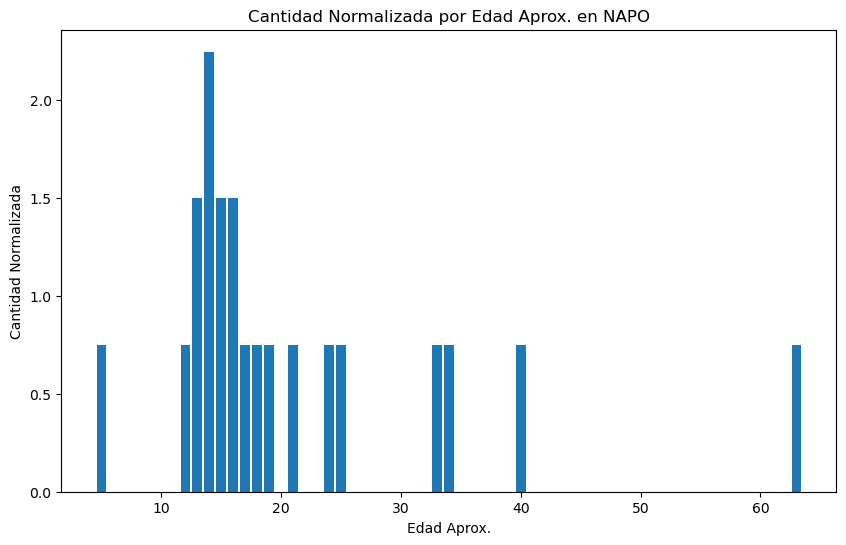

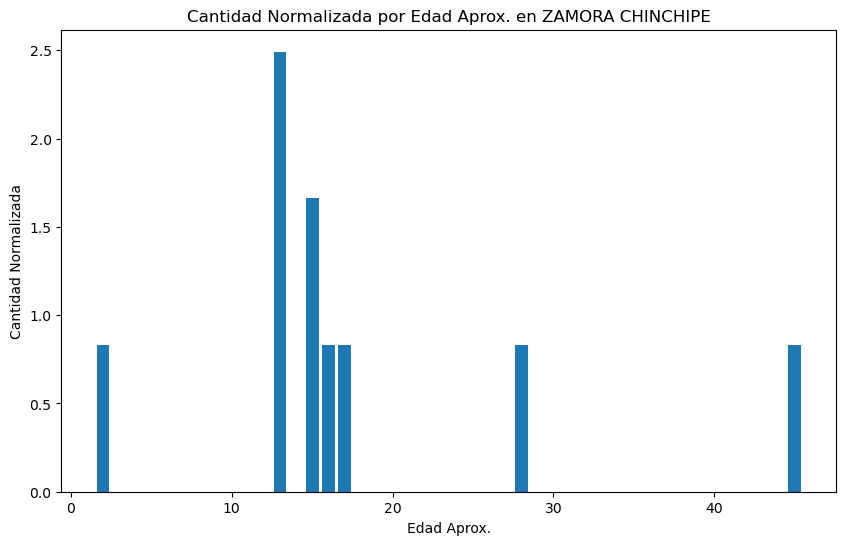

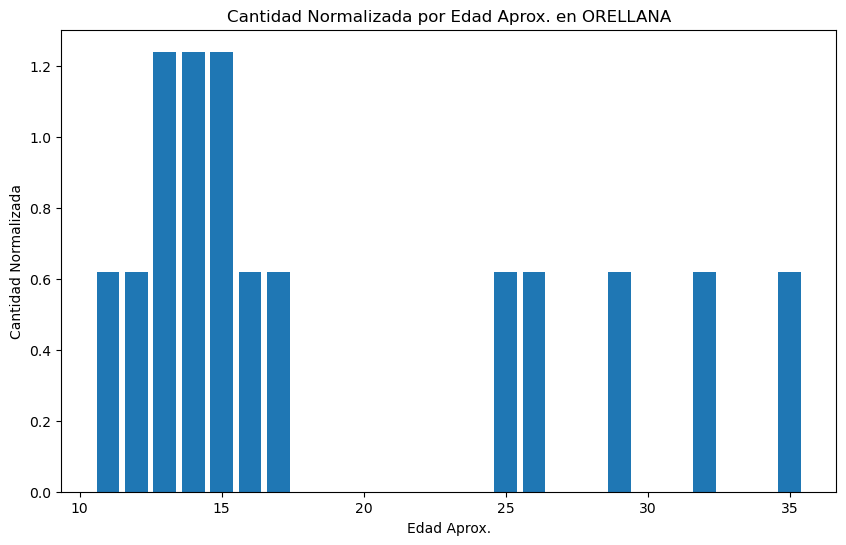

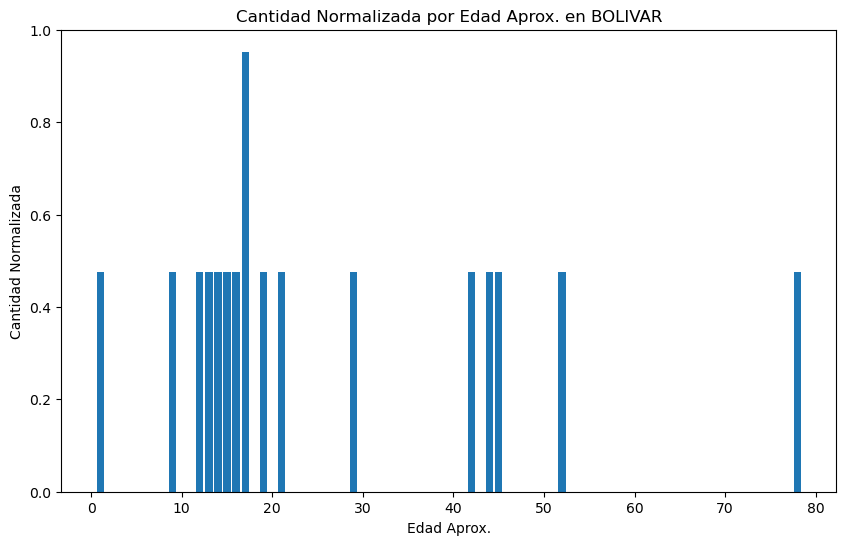

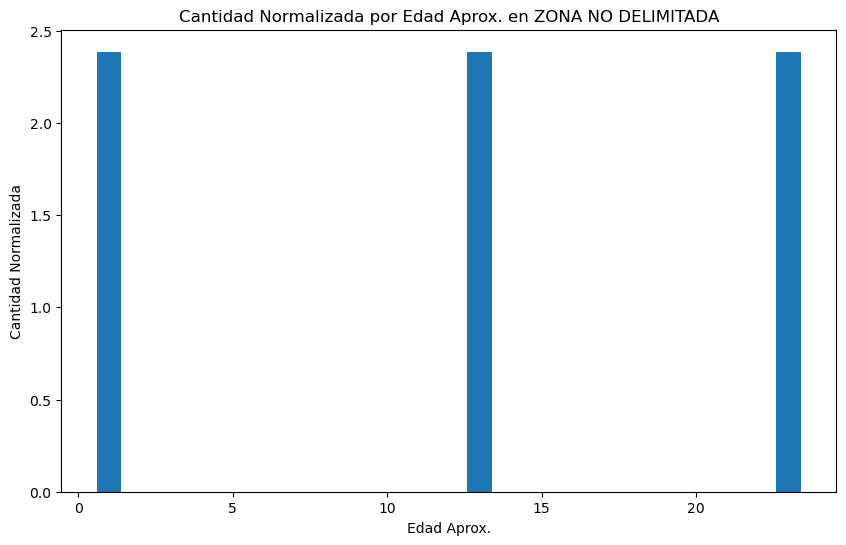

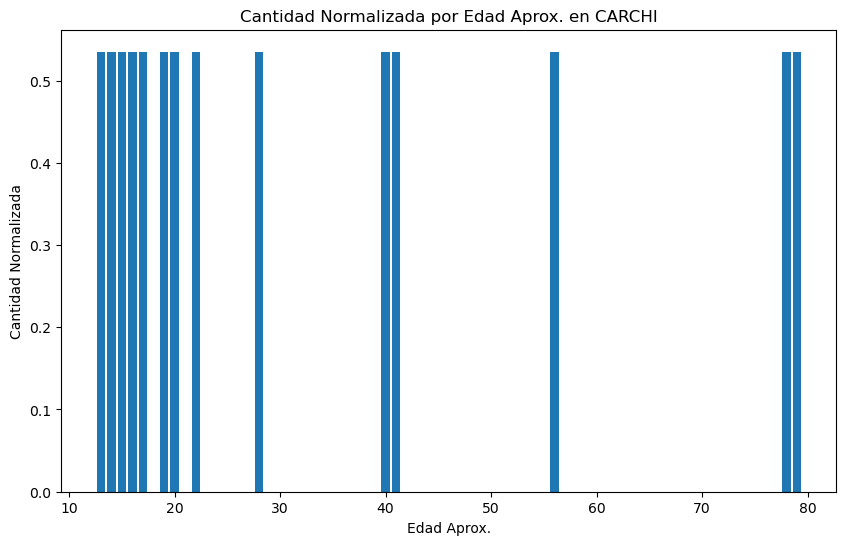

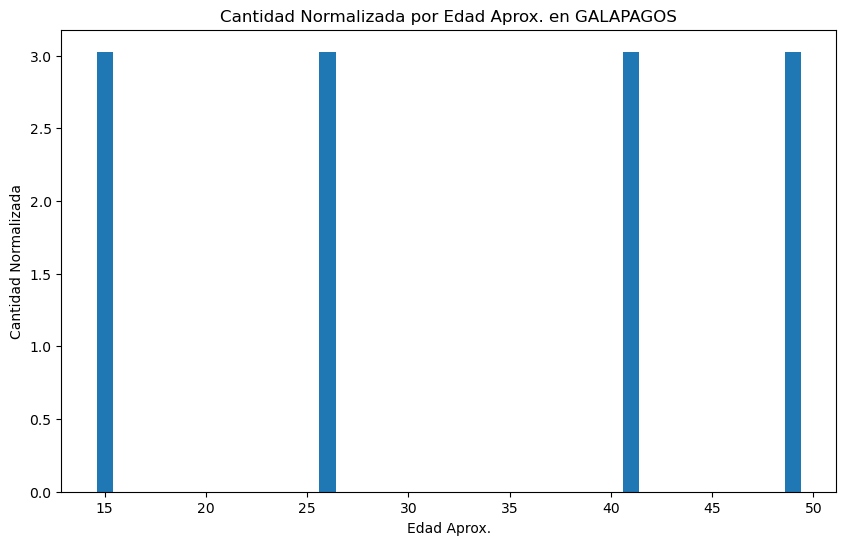

In [176]:
import matplotlib.pyplot as plt

# Obtener la lista de provincias únicas
provincias = grouped_counts['Provincia'].unique()

# Iterar sobre cada provincia
for provincia in provincias:
    # Filtrar los registros solo para la provincia actual
    provincia_df = grouped_counts[grouped_counts['Provincia'] == provincia]

    # Obtener los valores necesarios para el gráfico
    edades = provincia_df['Edad Aprox.']
    cantidades_normalizadas = provincia_df['Cantidad_Normalizada']

    # Configurar el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(edades, cantidades_normalizadas)
    plt.xlabel('Edad Aprox.')
    plt.ylabel('Cantidad Normalizada')
    plt.title(f'Cantidad Normalizada por Edad Aprox. en {provincia}')

    # Mostrar el gráfico para la provincia actual
    plt.show()


In [147]:
# Contar cuantos registros de la columna edad hay por provincia
conteo = datos['Provincia'].value_counts()
print(conteo)


PICHINCHA                         642
GUAYAS                            533
CHIMBORAZO                        147
SANTO DOMINGO DE LOS TSACHILAS    136
AZUAY                             116
MANABI                            113
EL ORO                            113
LOS RIOS                          109
ESMERALDAS                         83
TUNGURAHUA                         74
MORONA SANTIAGO                    74
LOJA                               72
IMBABURA                           67
COTOPAXI                           66
SUCUMBIOS                          37
SANTA ELENA                        33
NAPO                               32
CAÑAR                              29
BOLIVAR                            25
CARCHI                             21
PASTAZA                            21
ORELLANA                           20
ZAMORA CHINCHIPE                   11
GALAPAGOS                           4
ZONA NO DELIMITADA                  3
Name: Provincia, dtype: int64


In [148]:
# Normalizar el conteo
poblacion_total = 17800000
factor_ajuste = 100000/poblacion_total
#factor_ajuste = 100000

min_valor = conteo.min()
max_valor = conteo.max()

normalizado = (conteo / len(datos)) * (factor_ajuste)
print(normalizado)





PICHINCHA                         0.001397
GUAYAS                            0.001160
CHIMBORAZO                        0.000320
SANTO DOMINGO DE LOS TSACHILAS    0.000296
AZUAY                             0.000252
MANABI                            0.000246
EL ORO                            0.000246
LOS RIOS                          0.000237
ESMERALDAS                        0.000181
TUNGURAHUA                        0.000161
MORONA SANTIAGO                   0.000161
LOJA                              0.000157
IMBABURA                          0.000146
COTOPAXI                          0.000144
SUCUMBIOS                         0.000081
SANTA ELENA                       0.000072
NAPO                              0.000070
CAÑAR                             0.000063
BOLIVAR                           0.000054
CARCHI                            0.000046
PASTAZA                           0.000046
ORELLANA                          0.000044
ZAMORA CHINCHIPE                  0.000024
GALAPAGOS  

## Proporción de registros por provincia
### los datos fueron normalizados y su rango es registros encontrados por cada 100000 habitantes

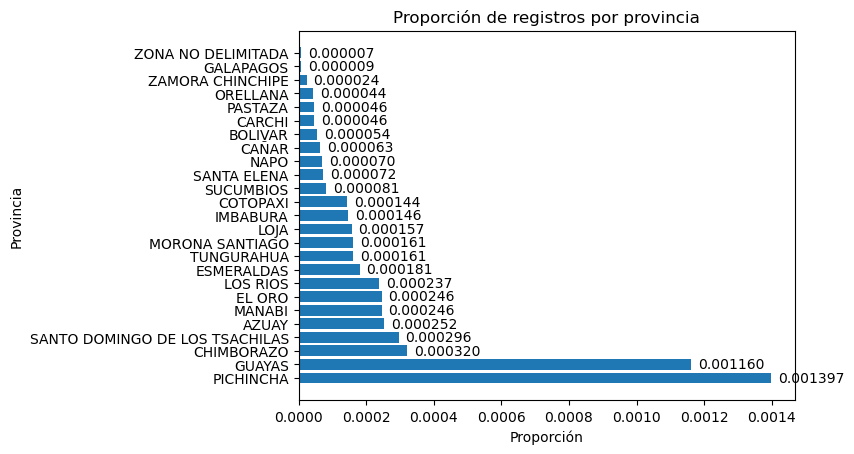

In [149]:
#plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.barh(normalizado.index, normalizado)

# Configurar etiquetas y título
plt.ylabel('Provincia')
plt.xlabel('Proporción')
plt.title('Proporción de registros por provincia')

# Agregar los valores normalizados al extremo derecho de cada fila
for i, value in enumerate(normalizado):
    plt.annotate(f'{value:.6f}', xy=(value, i), xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# Mostrar el gráfico
plt.show()

In [150]:
# Verificar columnas con valores nulos
columnas_nulos = datos.columns[datos.isnull().any()]
print("Columnas con valores nulos:")
print(columnas_nulos)

# Verificar columnas con valores vacíos
columnas_vacios = datos.columns[datos.eq('').any()]
print("Columnas con valores vacíos:")
print(columnas_vacios)

# Verificar columnas con valor "SIN_DATO"
columnas_sin_dato = datos.columns[datos.eq('SIN_DATO').any()]
print("Columnas con valor 'SIN_DATO':")
print(columnas_sin_dato)

Columnas con valores nulos:
Index([], dtype='object')
Columnas con valores vacíos:
Index([], dtype='object')
Columnas con valor 'SIN_DATO':
Index(['Motivo Desaparción', 'Motivo Desaparción Obs.', 'Fecha Localización'], dtype='object')


In [151]:
# Agrupar y contar cada columna
columnas_contadas = {}
for columna in datos.columns:
    columna_contada = datos[columna].value_counts()
    columnas_contadas[columna] = columna_contada

# Imprimir los resultados
for columna, conteo in columnas_contadas.items():
    print(f"Columna: {columna}")
    print(conteo)
    print()

Columna: Provincia
PICHINCHA                         642
GUAYAS                            533
CHIMBORAZO                        147
SANTO DOMINGO DE LOS TSACHILAS    136
AZUAY                             116
MANABI                            113
EL ORO                            113
LOS RIOS                          109
ESMERALDAS                         83
TUNGURAHUA                         74
MORONA SANTIAGO                    74
LOJA                               72
IMBABURA                           67
COTOPAXI                           66
SUCUMBIOS                          37
SANTA ELENA                        33
NAPO                               32
CAÑAR                              29
BOLIVAR                            25
CARCHI                             21
PASTAZA                            21
ORELLANA                           20
ZAMORA CHINCHIPE                   11
GALAPAGOS                           4
ZONA NO DELIMITADA                  3
Name: Provincia, dtype: int64



In [152]:
# Agrupar por "Motivo Desaparción" y "Motivo Desaparción Obs.", contar y ordenar
grupo_motivo = datos.groupby(["Motivo Desaparción", "Motivo Desaparción Obs."]).size().reset_index(name='conteo')
grupo_motivo = grupo_motivo.sort_values(by='conteo', ascending=False)

# Imprimir los resultados
for index, row in grupo_motivo.iterrows():
    motivo_desaparicion = row["Motivo Desaparción"]
    motivo_desaparicion_obs = row["Motivo Desaparción Obs."]
    conteo = row["conteo"]
    print(f"Motivo Desaparción: {motivo_desaparicion} - Motivo Desaparción Obs.: {motivo_desaparicion_obs} - Conte: {conteo}")

Motivo Desaparción: PROBLEMAS FAMILIARES - Motivo Desaparción Obs.: FAMILIA DISFUNSIONAL - Conte: 629
Motivo Desaparción: PROBLEMAS SOCIALES - Motivo Desaparción Obs.: INFLUENCIA DE AMISTADES - Conte: 514
Motivo Desaparción: PROBLEMAS FAMILIARES - Motivo Desaparción Obs.: PROBLEMAS SENTIMENTALES - Conte: 392
Motivo Desaparción: SIN_DATO - Motivo Desaparción Obs.: SIN_DATO - Conte: 381
Motivo Desaparción: PROBLEMAS SOCIALES - Motivo Desaparción Obs.: DELINCUENCIA - Conte: 97
Motivo Desaparción: FALLECIDO - Motivo Desaparción Obs.: NO DETERMINADA - Conte: 72
Motivo Desaparción: PROBLEMAS SOCIALES - Motivo Desaparción Obs.: DROGADICCION - Conte: 54
Motivo Desaparción: DISCAPACIDADES Y ENFERMEDADES - Motivo Desaparción Obs.: OTRAS ENFERMEDADES MENTALES - Conte: 54
Motivo Desaparción: PROBLEMAS SOCIALES - Motivo Desaparción Obs.: ALCOHOLISMO - Conte: 39
Motivo Desaparción: PROBLEMAS FAMILIARES - Motivo Desaparción Obs.: MALTRATO FISICO - Conte: 38
Motivo Desaparción: FALLECIDO - Motivo Desa

In [153]:
# Obtener el valor más repetido en cada columna
columnas_repeticiones = {}
for columna in datos.columns:
    valor_mas_repetido = datos[columna].mode()
    columnas_repeticiones[columna] = valor_mas_repetido

# Imprimir los resultados
for columna, valor_repetido in columnas_repeticiones.items():
    print(f"Columna: {columna}")
    for valor in valor_repetido:
        conteo = datos[columna].value_counts()[valor]
        print(f"Dato: {valor} - Conte: {conteo}")
    print()

Columna: Provincia
Dato: PICHINCHA - Conte: 642

Columna: Latitud
Dato: -0,327644 - Conte: 11
Dato: -0,7140022 - Conte: 11

Columna: Longitud
Dato: -78,5673547 - Conte: 11
Dato: -80,109357 - Conte: 11

Columna: Edad Aprox.
Dato: 15 - Conte: 290

Columna: Sexo
Dato: MUJER - Conte: 1527

Columna: Motivo Desaparción
Dato: PROBLEMAS FAMILIARES - Conte: 1092

Columna: Motivo Desaparción Obs.
Dato: FAMILIA DISFUNSIONAL - Conte: 629

Columna: Fecha Desaparición
Dato: 26/3/2023 - Conte: 40

Columna: Situación Actual
Dato: ENCONTRADO - Conte: 2067

Columna: Fecha Localización
Dato: SIN_DATO - Conte: 381



## El perfil de la persona mas suceptible a desaparecer es:

### Provincia: Pichincha
### Edad: 15
### Sexo: MUJER 
### Motivo Desaparción: PROBLEMAS FAMILIARES
### Motivo Desaparción Obs.: FAMILIA DISFUNSIONAL
### Fecha Desaparición: 26/3/2023
### Mes: Marzo 

## El perfil de la persona mas suceptible a desaparecer por cada provincia es:


In [154]:
# Agrupar por provincia
grupo_provincia = datos.groupby('Provincia')

# Iterar sobre cada grupo
for provincia, grupo in grupo_provincia:
    print(f"Provincia: {provincia}")
    print("-------------------------------")

    # Iterar sobre cada columna
    for columna in grupo.columns:
        if columna != 'Provincia':
            conteo = grupo[columna].value_counts()
            max_repetidos = conteo[conteo == conteo.max()]

            print(f"Columna: {columna}")
            print(f"Dato(s) más repetido(s):")
            for dato, count in max_repetidos.items():
                print(f"Dato: {dato} - Conteo: {count}")
            
            print("-------------------------------")
    
    print("\n")

Provincia: AZUAY
-------------------------------
Columna: Latitud
Dato(s) más repetido(s):
Dato: -2,863187 - Conteo: 3
-------------------------------
Columna: Longitud
Dato(s) más repetido(s):
Dato: -78,964005 - Conteo: 3
-------------------------------
Columna: Edad Aprox.
Dato(s) más repetido(s):
Dato: 15 - Conteo: 17
-------------------------------
Columna: Sexo
Dato(s) más repetido(s):
Dato: MUJER - Conteo: 62
-------------------------------
Columna: Motivo Desaparción
Dato(s) más repetido(s):
Dato: PROBLEMAS FAMILIARES - Conteo: 45
-------------------------------
Columna: Motivo Desaparción Obs.
Dato(s) más repetido(s):
Dato: INFLUENCIA DE AMISTADES - Conteo: 28
-------------------------------
Columna: Fecha Desaparición
Dato(s) más repetido(s):
Dato: 18/3/2023 - Conteo: 5
Dato: 6/2/2023 - Conteo: 5
-------------------------------
Columna: Situación Actual
Dato(s) más repetido(s):
Dato: ENCONTRADO - Conteo: 91
-------------------------------
Columna: Fecha Localización
Dato(s) má

In [155]:
# Función para categorizar las edades
def categorizar_edad(edad):
    if edad < 12:
        return 'Niños'
    elif 12 <= edad <= 17:
        return 'Jóvenes'
    else:
        rango_superior = (edad // 5) * 5
        rango_inferior = rango_superior - 4
        return f'{rango_inferior} a {rango_superior}'

# Aplicar la función a la columna 'Edad Aprox.' y crear una nueva columna 'Categoría Edad'
datos['Categoría Edad'] = datos['Edad Aprox.'].apply(categorizar_edad)

# Imprimir el dataframe resultante
print(datos.head(15))


                         Provincia      Latitud      Longitud  Edad Aprox.  \
0                        PICHINCHA   -0,2188216   -78,5135489           17   
1                        PICHINCHA  -0,26909023  -78,54001523           17   
2   SANTO DOMINGO DE LOS TSACHILAS    0,0091672    -79,391605           39   
3                        PICHINCHA  -0,17504166  -78,47478184           14   
4                       ESMERALDAS    0,9873857  -79,65649069           28   
5                           GUAYAS   -2,1225293    -80,000135           28   
6   SANTO DOMINGO DE LOS TSACHILAS   -0,2683217   -79,1978398           42   
7                           GUAYAS   -2,1258684   -79,9227452           16   
8                       CHIMBORAZO   -1,6604411   -78,6563855           12   
9                        PICHINCHA  -0,21867203  -78,50517916           16   
10                        IMBABURA    0,3475869   -78,1160486           23   
11                          GUAYAS  -2,11391357  -79,98889708   

In [156]:
# Imprimir las columnas "Edad" y "Categoría Edad"
# print(datos[['Provincia','Edad Aprox.', 'Categoría Edad']].head(30))


## Categorizar los datos por rangos de edad.


In [157]:
# Categorizar la columna de Edad Aproximada
def categorizar_edad(edad):
    if edad <= 12:
        return 'Niños'
    elif 13 <= edad <= 18:
        return 'Jóvenes'
    else:
        rango_superior = (edad // 5) * 5
        r+ango_inferior = rango_superior - 4
        return f'{rango_inferior} a {rango_superior}'

datos['Categoría Edad'] = datos['Edad Aprox.'].apply(categorizar_edad)

# Agrupar por provincia y categoría de edad, y contar el número de ocurrencias
agrupado = datos.groupby(['Provincia', 'Categoría Edad']).size().unstack()

# Crear el histograma
agrupado.plot(kind='bar', stacked=True, figsize=(12, 8))

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Edades por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')

# Mostrar el histograma
plt.show()

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (2780569755.py, line 9)

In [ ]:
# Categorizar la columna de Edad Aproximada
def categorizar_edad(edad):
    if edad <= 12:
        return 'Niños'
    elif 13 <= edad <= 18:
        return 'Jóvenes'
    else:
        rango_superior = (edad // 5) * 5
        rango_inferior = rango_superior - 4
        return f'{rango_inferior} a {rango_superior}'

datos['Categoría Edad'] = datos['Edad Aprox.'].apply(categorizar_edad)

# Obtener las provincias únicas
provincias = datos['Provincia'].unique()

# Imprimir el conteo de registros por categoría de edad para cada provincia
for provincia in provincias:
    print(f'Provincia: {provincia}')
    filtro = datos['Provincia'] == provincia
    conteo = datos[filtro]['Categoría Edad'].value_counts()
    print(conteo)
    print()

In [ ]:
# Categorizar la columna de Edad Aproximada
def categorizar_edad(edad):
    if edad <= 12:
        return 'Niños'
    elif 13 <= edad <= 18:
        return 'Jóvenes'
    else:
        rango_superior = (edad // 5) * 5
        rango_inferior = rango_superior - 4
        return f'{rango_inferior} a {rango_superior}'

datos['Categoría Edad'] = datos['Edad Aprox.'].apply(categorizar_edad)

# Agrupar por provincia y categoría de edad, contar los registros y resetear el índice
conteo = datos.groupby(['Provincia', 'Categoría Edad'])['Categoría Edad'].count().reset_index(name='edad')

# Imprimir la tabla resultante
# print(conteo.head(45))


In [ ]:
# Categorizar la columna de Edad Aproximada
def categorizar_edad(edad):
    if edad <= 12:
        return 'niños'
    elif 13 <= edad <= 18:
        return 'jovenes'
    else:
        rango_superior = (edad // 5) * 5
        rango_inferior = rango_superior - 4
        return f'{rango_inferior} a {rango_superior}'

datos['Categoría Edad'] = datos['Edad Aprox.'].apply(categorizar_edad)

# Agrupar por provincia, categoría de edad y contar
conteo_edad = datos.groupby(['Provincia', 'Categoría Edad']).size().reset_index(name='edad')

# Ordenar descendente por categoría de edad y alfabéticamente por provincia
conteo_edad = conteo_edad.sort_values(['Categoría Edad', 'Provincia'], ascending=[False, True])

# Imprimir los resultados
# print(conteo_edad.to_string(index=True))

In [ ]:

# Leer el archivo CSV
df = pd.read_csv('data/mdg_personasdesaparecidas_pm_2023_enero_abril.csv', encoding='latin1', sep=';')

# Convertir la columna 'Fecha Desaparición' al formato de fecha
df['Fecha Desaparición'] = pd.to_datetime(df['Fecha Desaparición'], dayfirst=True)
# Crear una nueva columna 'Mes' que contenga el mes de la fecha de desaparición
df['Mes'] = df['Fecha Desaparición'].dt.month
# Contar el número de desapariciones por mes
meses_desapariciones = df['Mes'].value_counts()
print(meses_desapariciones)
# Obtener el mes con mayor cantidad de desapariciones
mes_max_desapariciones = meses_desapariciones.idxmax()

# Imprimir el resultado
print("El mes con mayor cantidad de desapariciones fue:", mes_max_desapariciones)


In [ ]:
# Leer el archivo CSV
data = pd.read_csv('data/mdg_personasdesaparecidas_pm_2023_enero_abril.csv', encoding='latin1', sep=';')

# Convertir la columna 'Fecha Desaparición' al formato de fecha
data['Fecha Desaparición'] = pd.to_datetime(data['Fecha Desaparición'], dayfirst=True)

# Crear una nueva columna 'Mes' que contenga el mes de la fecha de desaparición
data['Mes'] = data['Fecha Desaparición'].dt.month

# Filtrar los datos solo para los meses de enero, febrero, marzo y abril
meses_seleccionados = [1, 2, 3, 4]
data_seleccionada = data[data['Mes'].isin(meses_seleccionados)]

# Contar el número de desapariciones por mes
meses_desapariciones = data_seleccionada['Mes'].value_counts()

# Ordenar los meses en orden ascendente
meses_desapariciones = meses_desapariciones.sort_index()

# Obtener los nombres de los meses
nombres_meses = [calendar.month_name[mes] for mes in meses_desapariciones.index]

# Graficar los meses y el número de desaparecidos
plt.bar(nombres_meses, meses_desapariciones.values)
plt.xlabel('Mes')
plt.ylabel('Número de desaparecidos')
plt.title('Número de desaparecidos por mes (Enero - Abril) del 2023')

# Mostrar el número de desaparecidos encima de cada barra
for i, v in enumerate(meses_desapariciones.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()